In [4]:
import numpy as np
import cv2
# pip install opencv-python
# opencv is used to convert images into array
# colour images are the 3D array with R (Red), G(green) and B(Blue) channel with Images Height & Weight 
import os
import random
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime

import tensorflow as tf

# a very usefull tool Tensorboard (from tensorflow) which helps to visualize and compare different models visually
# more advanced visualization tool than matplotlib
from tensorflow.keras.callbacks import TensorBoard

In [2]:
# read the dataset
DIRECTORY = r'D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset'
CATEGORIES = ['cat','dog']


In [3]:
IMG_SIZE = 100

data = []

# now read the images from cat & dog folder and convert them into arrays
for category in CATEGORIES:
    # now join the 2 paths - DIRECTORIES and CATEGORIES
    folder = os.path.join(DIRECTORY, category)
    # put the index as label (e.g. 0 as cat and 1 as dog to make the computer/machine understand)
    label = CATEGORIES.index(category)
    #print(folder)
    # output of the above print command as below :
    # D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\cat
    # D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\dog
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        #print(img_path)
        # pickup each image from each folder
        # output of the above print command as below :
        # D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\cat\cat.1.jpg
        # D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\dog\dog.1.jpg
        #break
        # now convert the images into array using opencv(i.e.CV2).imgread()
        # read the image and put it into array and visualize the image
        img_arr = cv2.imread(img_path)
        #plt.imshow(img_arr)
        #break
        # NOTE : all the images should same size, otherwise machine learning model will able to understnd
        # so we need to resize the image with same size for all images
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))  # transform all the image into 100 x 100 size
        #plt.imshow(img_arr)
        #break
        data.append([img_arr, label])
        

In [4]:
# 4000 image of cat and 4000 image of dog
# total 8000 images
len(data)

8000

In [5]:
# now shuffle the data to mix cat and dog images
random.shuffle(data)

In [6]:
data[0]

[array([[[ 25,  42,  55],
         [ 26,  43,  56],
         [ 28,  44,  58],
         ...,
         [ 69,  90,  92],
         [ 66,  87,  89],
         [ 64,  85,  87]],
 
        [[ 26,  43,  56],
         [ 27,  44,  57],
         [ 28,  45,  58],
         ...,
         [ 70,  91,  93],
         [ 68,  89,  91],
         [ 66,  87,  88]],
 
        [[ 26,  43,  56],
         [ 27,  44,  57],
         [ 28,  46,  58],
         ...,
         [ 71,  91,  93],
         [ 69,  90,  92],
         [ 66,  87,  89]],
 
        ...,
 
        [[ 98, 105, 110],
         [ 99, 106, 111],
         [ 83,  93,  97],
         ...,
         [ 99, 121, 126],
         [ 46,  68,  73],
         [ 74,  98, 102]],
 
        [[ 94, 105, 109],
         [ 93, 103, 107],
         [ 89, 101, 104],
         ...,
         [ 96, 118, 123],
         [ 47,  69,  74],
         [ 65,  90,  94]],
 
        [[104, 116, 120],
         [ 99, 111, 115],
         [ 99, 111, 115],
         ...,
         [ 93, 115, 120],
  

In [7]:
# prepare 2 list for Features and Labels
X = []
y = []

for features,labels in data:
    X.append(features)
    y.append(labels)

In [8]:
# convert X and y into array
X = np.array(X)
y = np.array(y)

In [9]:
len(X)

8000

In [10]:
len(y)

8000

In [11]:
# save into pickle file
# wb => write in binary
#import pickle

#file = open('X.pkl','wb')
# dump information to that file
#pickle.dump(X,file)

#file1 = open('y.pkl','wb')
# dump information to that file
#pickle.dump(y,file1)

pickle.dump(X, open(f'D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\X.pkl','wb')) 
pickle.dump(y, open(f'D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\y.pkl','wb')) 

In [61]:
# read these pickle file
# rb => read in binary
X = pickle.load(open(f'D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\X.pkl','rb'))
y = pickle.load(open(f'D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\y.pkl','rb'))


In [62]:
X
# NOTE all the values of 3D ( R G B channel) array will between 0 to 255 

array([[[[ 25,  42,  55],
         [ 26,  43,  56],
         [ 28,  44,  58],
         ...,
         [ 69,  90,  92],
         [ 66,  87,  89],
         [ 64,  85,  87]],

        [[ 26,  43,  56],
         [ 27,  44,  57],
         [ 28,  45,  58],
         ...,
         [ 70,  91,  93],
         [ 68,  89,  91],
         [ 66,  87,  88]],

        [[ 26,  43,  56],
         [ 27,  44,  57],
         [ 28,  46,  58],
         ...,
         [ 71,  91,  93],
         [ 69,  90,  92],
         [ 66,  87,  89]],

        ...,

        [[ 98, 105, 110],
         [ 99, 106, 111],
         [ 83,  93,  97],
         ...,
         [ 99, 121, 126],
         [ 46,  68,  73],
         [ 74,  98, 102]],

        [[ 94, 105, 109],
         [ 93, 103, 107],
         [ 89, 101, 104],
         ...,
         [ 96, 118, 123],
         [ 47,  69,  74],
         [ 65,  90,  94]],

        [[104, 116, 120],
         [ 99, 111, 115],
         [ 99, 111, 115],
         ...,
         [ 93, 115, 120],
        

In [63]:
y
# all the values will be 0 or 1 ( because this label)

array([0, 1, 0, ..., 1, 1, 0])

In [64]:
# feature scaling 
# less the value , fast it will calculate
X = X / 255
X

array([[[[0.09803922, 0.16470588, 0.21568627],
         [0.10196078, 0.16862745, 0.21960784],
         [0.10980392, 0.17254902, 0.22745098],
         ...,
         [0.27058824, 0.35294118, 0.36078431],
         [0.25882353, 0.34117647, 0.34901961],
         [0.25098039, 0.33333333, 0.34117647]],

        [[0.10196078, 0.16862745, 0.21960784],
         [0.10588235, 0.17254902, 0.22352941],
         [0.10980392, 0.17647059, 0.22745098],
         ...,
         [0.2745098 , 0.35686275, 0.36470588],
         [0.26666667, 0.34901961, 0.35686275],
         [0.25882353, 0.34117647, 0.34509804]],

        [[0.10196078, 0.16862745, 0.21960784],
         [0.10588235, 0.17254902, 0.22352941],
         [0.10980392, 0.18039216, 0.22745098],
         ...,
         [0.27843137, 0.35686275, 0.36470588],
         [0.27058824, 0.35294118, 0.36078431],
         [0.25882353, 0.34117647, 0.34901961]],

        ...,

        [[0.38431373, 0.41176471, 0.43137255],
         [0.38823529, 0.41568627, 0.43529412]

In [65]:
X.shape
# note the out would be total(cat+dog) images, weidth, height, number of channel (i.e. 3 => R, G, B)

(8000, 100, 100, 3)

In [66]:
# import necessary libraries for Convolution Neural Network (CNN)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Dense => Hidden Layers

In [67]:
# Design the Model
# -----------------

# feature => conv layer => activation => Max Pooling => activation => conv layer => activation => flatten => Dense => final layer => output 
model = Sequential()

# 1st conv laeyrs
# here total 64 feature extraction/layers, each layer is 3x3 matrix and activation function would be relu
model.add(Conv2D(64, (3,3), activation='relu'))
#max pooling 2x2 matrix which people usually used
model.add(MaxPooling2D((2,2)))

# 2nd conv laeyrs
# here total 64 feature extraction/layers, each layer is 3x3 matrix and activation function would be relu
model.add(Conv2D(64, (3,3), activation='relu'))
#max pooling 2x2 matrix which people usually used
model.add(MaxPooling2D((2,2)))

# 3rd conv layer & max plloing layer
#model.add(Conv2D(64, (3,3), activation='relu'))
#max pooling 2x2 matrix which people usually used
#model.add(MaxPooling2D((2,2)))

# flatten
# represent matrix elemets from top to down . It's 1D array
model.add(Flatten())

# Dense / Hidden layers
# total 168 neurons, input spape means image 
# X.shape[1:] ==> from 1st index take everything, so from X.shape => (8000, 100, 100, 3)
# 1st index is 100
# so 100,100,3
model.add(Dense(168, input_shape = X.shape[1:], activation = 'relu'))

# add another dense layer for more accuracy
model.add(Dense(128, activation = 'relu'))
# add another dense layer for more accuracy
#model.add(Dense(128, activation = 'relu'))

# output laeyrs
# since we have two outputs like Cat and Dog, so mentioned 2 here
# activation function can be softmax and sigmoid, but softmax would be better option here
model.add(Dense(2, activation = 'softmax'))

In [68]:
# now add loss function and optimizer ( which helps to update weights and bias during Back propagation)
# sparse categorical cross entropy
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [69]:
len(X)

8000

In [70]:
len(y)

8000

In [71]:
# create a tensorboard object
NAME = f'cat-vs-dog-prediction-{int(time.time())}'
#D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset
log_dir = f'D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\logs\{NAME}'
print(log_dir)

#tensorboard = TensorBoard(log_dir=f'logs\\{NAME}\\')
print(format(time))
tensorboard = TensorBoard(log_dir=log_dir)

D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\logs\cat-vs-dog-prediction-1616997017
<module 'time' (built-in)>


In [72]:
# fit the above model into dataset
# 6 iteration
# validation spilit would be 10% here means 10% of 8000 (i.e. 800) would be used for testing/validation
# so training data would be 8000 - 800 = 7200
# since batch_size=32, so 7200/32 = 225
# 225 samples per batch, so 32*225 = 7200

# https://keras.io/api/callbacks/tensorboard/

#model.fit(X, y, epochs=5, validation_split=0.1, batch_size=32, callbacks=[tensorboard])
history = model.fit(X, y, epochs=6, validation_split=0.1, batch_size=32, callbacks=[tensorboard])

Epoch 1/6
225/225 [==============================] - 106s 447ms/step - loss: 0.7393 - accuracy: 0.5196 - val_loss: 0.6494 - val_accuracy: 0.6212
Epoch 2/6
225/225 [==============================] - 99s 440ms/step - loss: 0.6351 - accuracy: 0.6456 - val_loss: 0.5985 - val_accuracy: 0.6875
Epoch 3/6
225/225 [==============================] - 101s 448ms/step - loss: 0.5263 - accuracy: 0.7330 - val_loss: 0.6010 - val_accuracy: 0.6875
Epoch 4/6
225/225 [==============================] - 100s 446ms/step - loss: 0.4020 - accuracy: 0.8118 - val_loss: 0.5843 - val_accuracy: 0.7163
Epoch 5/6
225/225 [==============================] - 101s 449ms/step - loss: 0.2288 - accuracy: 0.9042 - val_loss: 0.6870 - val_accuracy: 0.7000
Epoch 6/6
225/225 [==============================] - 101s 450ms/step - loss: 0.1194 - accuracy: 0.9581 - val_loss: 1.0354 - val_accuracy: 0.7038


In [73]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


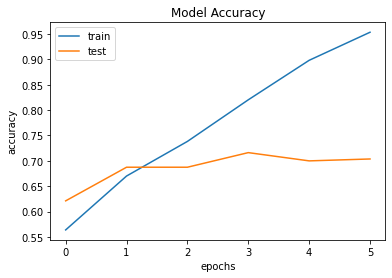

In [74]:
# plot the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

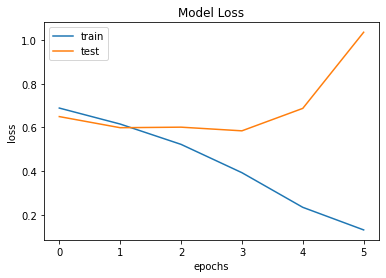

In [75]:
# plot the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [76]:
# now predict from the new images
predict_dir_path = f'D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST'
#predict_dir_path

In [77]:
# go the the predict image path and pick evry images

#predict_images = [f for f in os.listdir(predict_dir_path)]
predict_images = [img for img in os.listdir(predict_dir_path)]
print(predict_images)
    

['101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '120.jpg', '121.jpg', '122.jpg']


In [78]:

aa = "\\"
#print(predict_dir_path+aa)

 
for file in predict_images:
    #print(file)
    print(predict_dir_path+aa+file)

D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\101.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\102.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\103.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\104.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\105.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\106.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\107.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\108.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\111.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\112.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat Recognition\dataset\TEST\113.jpg
D:\KUNTAL\Python\python_notes\TensorFlow\Dog and Cat R

In [79]:
from keras.preprocessing import image

cat_counter = 0
dog_counter = 0

img_width = 100
img_height = 100

aa = "\\"

for file in predict_images:
    # Loads an image into PIL format.
    #print(predict_dir_path+ '\' + file)
    #img = image.load_img(predict_dir_path+file, target_size=(img_width,img_height))
    img = image.load_img(predict_dir_path+aa+file, target_size=(img_width,img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images,batch_size=10)
    #classes = classes[0][0]
    
    # 0 => cat , 1 => dog
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
        
print('Total Cats :'+ str(cat_counter))       
print('Total Dogs :'+ str(dog_counter))       


101.jpg: cat
102.jpg: cat
103.jpg: cat
104.jpg: cat
105.jpg: dog
106.jpg: dog
107.jpg: dog
108.jpg: dog
111.jpg: dog
112.jpg: dog
113.jpg: dog
114.jpg: dog
115.jpg: dog
116.jpg: dog
117.jpg: dog
118.jpg: dog
119.jpg: dog
120.jpg: dog
121.jpg: dog
122.jpg: cat
Total Cats :5
Total Dogs :15
